<a href="https://colab.research.google.com/github/d-tomas/workshops/blob/main/20210217/notebooks/visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización

En este *notebook* vamos a aplicar algunas técncias de visualización de los datos. Vamos a usar principalmente la librería Pandas para almacenar los datos tabulares y Seaborn para visualizarlos.

## Pasos previos

In [ ]:
# Importamos las librerías de Python que necesitaremos en este notebook

import matplotlib.pyplot as plt  # Para hacer gráficas
import pandas as pd
import seaborn as sns  # Para hacer gráficas
from wordcloud import WordCloud  # Para crear las nubes de palabras
import spacy  # Para análisis de texto (para hacer la nube de palabras)

spacy.cli.download('en_core_web_md')  # Para instalar el modelo de Spacy y hacer análisis de texto en inglés
sns.set_style('whitegrid')  # Pone una malla de fondo bastante mona para Seaborn

Vamos a trabajar de nuevo con los datos sobre ventas históricas de videojuegos. Recuerda, cada fila contiene la siguiente información:

* `Rank`: ranking de ventas totales
* `Name`: nombre del videojuego
* `Platform`: plataforma en la que se publicó el juego (e.g. PC, PS4, ...)
* `Year`: año de publicación del juego
* `Genre`: género (e.g. acción, aventuras, ...)
* `Publisher`: compañía distribuidora
* `NA_Sales`: ventas en Norte América (en millones de copias)
* `EU_Sales`: ventas en Europa (en millones de copias)
* `JP_Sales`: ventas en Japón (en millones de copias)
* `Other_Sales`: ventas en el resto del mundo (en millones de copias)
* `Global_Sales`: ventas mundiales totales (en millones de copias)

In [ ]:
# Cargamos los datos en formato CSV

data = pd.read_csv('https://raw.githubusercontent.com/d-tomas/workshops/main/20210217/datasets/video_game_sales.csv')
data

## Cuarteto de Anscombe

Antes de empezar a trabajar con los datos sobre venta de videojuegos, vamos a ver un ejemplo práctico de la importancia de la visualización en la interpretación de los datos.

El **cuarteto de Anscombe** (*Anscombe's quartet*) lo forman cuatro conjuntos de datos creados por Frank Anscombe en 1973. Sus estadísticas descriptivas (media, varianza, correlación y regresión) son casi idénticas. Sin embargo, sus distribuciones son muy diferentes cuando se muestran en un gráfico.

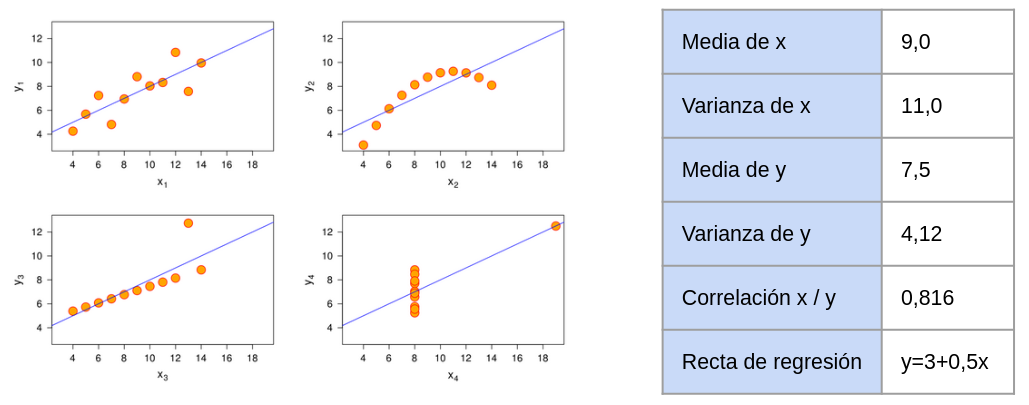

In [ ]:
# Vamos a descargar dos conjuntos de datos para este ejemplo

!wget https://raw.githubusercontent.com/d-tomas/workshops/main/20210217/datasets/anscombe_1.csv
!wget https://raw.githubusercontent.com/d-tomas/workshops/main/20210217/datasets/anscombe_2.csv

In [ ]:
# Creamos una tabla con Pandas para cada uno de los ficheros

anscombe_1 = pd.read_csv('anscombe_1.csv')
anscombe_2 = pd.read_csv('anscombe_2.csv')

In [ ]:
# Mostramos su contenido por pantalla para ver qué pinta tienen

anscombe_1

In [ ]:
# Y el otro

anscombe_2

In [ ]:
# Cuesta de ver si ambos conjuntos se parecen o no a simple vista...
# Vamos a calcular sus estadísticas básicas: media, desviación estándar y correlación

print('Dataset Anscombe 1')
print('Muestras: ' + str(len(anscombe_1.index)))
print('Media x: ' + '{:.3f}'.format(anscombe_1.mean()['x']))
print('Media y: ' + '{:.3f}'.format(anscombe_1.mean()['y']))
print('Desviación x: ' + '{:.3f}'.format(anscombe_1.std()['x']))
print('Desviación y: ' + '{:.3f}'.format(anscombe_1.std()['y']))
print('Correlación: ' + '{:.3f}'.format(anscombe_1.corr()['x']['y']))

In [ ]:
# Lo mismo para el segundo dataset

print('Dataset Anscombe 2')
print('Muestras: ' + str(len(anscombe_2.index)))
print('Media x: ' + '{:.3f}'.format(anscombe_2.mean()['x']))
print('Media y: ' + '{:.3f}'.format(anscombe_2.mean()['y']))
print('Desviación x: ' + '{:.3f}'.format(anscombe_2.std()['x']))
print('Desviación y: ' + '{:.3f}'.format(anscombe_2.std()['y']))
print('Correlación: ' + '{:.3f}'.format(anscombe_2.corr()['x']['y']))

In [ ]:
# Visualizamos el primer dataset

sns.scatterplot(data=anscombe_1, x='x', y='y')
plt.show()

In [ ]:
# Visualizamos el segundo dataset

sns.scatterplot(data=anscombe_2, x='x', y='y', color='green')
plt.show()

## Diagrama de barras

* Útiles para visualizar distribuciones de valores discretos o categoriales (ej. años, nombres de países, tipos de pantallas de TV, ...)
* Representa gráficamente la comparación entre distintas categorías (ej. para comparar ventas por años)


In [ ]:
# ¿Qué año se vendieron más videojuegos?

plt.figure(figsize=(14,7))
sns.countplot(x='Year', data=data)
plt.xticks(rotation=-45)  # Rotamos las etiquetas para que no se solapen
plt.show()

In [ ]:
# ¡Un diagrama de barras se puede ordenar!
# Repetimos el diagrama de antes, pero ordenado

plt.figure(figsize=(14, 7))
sns.countplot(x='Year', data=data, order=data['Year'].value_counts().index)
# Si además queremos quitar la molesta parte decimal de las etiquetas del eje x...
locs, labels = plt.xticks()
labels = [int(t) for t in data['Year'].value_counts().index]
plt.xticks(locs, labels, rotation=-45)
plt.show()


In [ ]:
# Otro ejemplo: ¿qué plataforma tiene más juegos en este ranking?
# Usamos de nuevo la ordenación para que se vea mejor

plt.figure(figsize=(14,7))
sns.countplot(x='Platform', data=data, order=data['Platform'].value_counts().index)
plt.xticks(rotation=-45)
plt.show()

In [ ]:
# Y ya que estamos, ¿qué género es el más popular?

plt.figure(figsize=(14,7))
sns.countplot(x='Genre', data=data, order=data['Genre'].value_counts().index)
plt.xticks(rotation=-45)
plt.show()

In [ ]:
# ¿Y qué compañía ha lanzado más juegos al mercado?
# Usamos 'barplot' en lugar de 'countplot' porque en 'publisher_counts' ya hemos contado cuántos juegos hay por compañía

publisher_counts = data['Publisher'].value_counts()[:20]  # Nos quedamos con los veinte primeros

plt.figure(figsize=(14,7))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.xticks(rotation=90)  # Rotamos las etiquetas para que no se solapen
plt.show()

In [ ]:
# Lo realmente importantes: ¿qué compañía ha vendido más juegos todos estos años?
# Podemos usar 'barplot' de nuevo para eso

publisher_sales = data.groupby(by=['Publisher'])['Global_Sales'].sum()  # Agrupamos ventas por compañía
publisher_sales = publisher_sales.sort_values(ascending=False)[:20]  # Nos quedamos con el Top 20

plt.figure(figsize=(14, 7))
sns.barplot(x=publisher_sales.index, y=publisher_sales.values)
plt.xticks(rotation=90)
plt.show()

## Diagrama de líneas

* Útil para visualizar tendencias
* Muy habituales en series temporales (ej. cómo evoluciona el número de habitantes en una ciudad a lo largo de los años)
* Muestra los datos como puntos unidos por líneas rectas


In [ ]:
# Comparamos cómo evolucionan las ventas en los distintos países a lo largo de los años

# Nos quedamos con las columnas que nos interesan: año, ventas en USA, en Europa, en Japón y en otros países
year_sales = data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by='Year').sum()

plt.figure(figsize=(14, 7))
sns.lineplot(data=year_sales)
plt.show()

## Diagrama de dispersión

* Útil para identificar relaciones, patrones o tendencias entre dos valores numéricos
* Permite visualizar agrupaciones de datos:
 * Identificar valores extremos (*outliers*)
 * Explorar correlaciones (si un valor implica al otro)
* Recuerda: **¡¡correlación no implica causalidad!!**


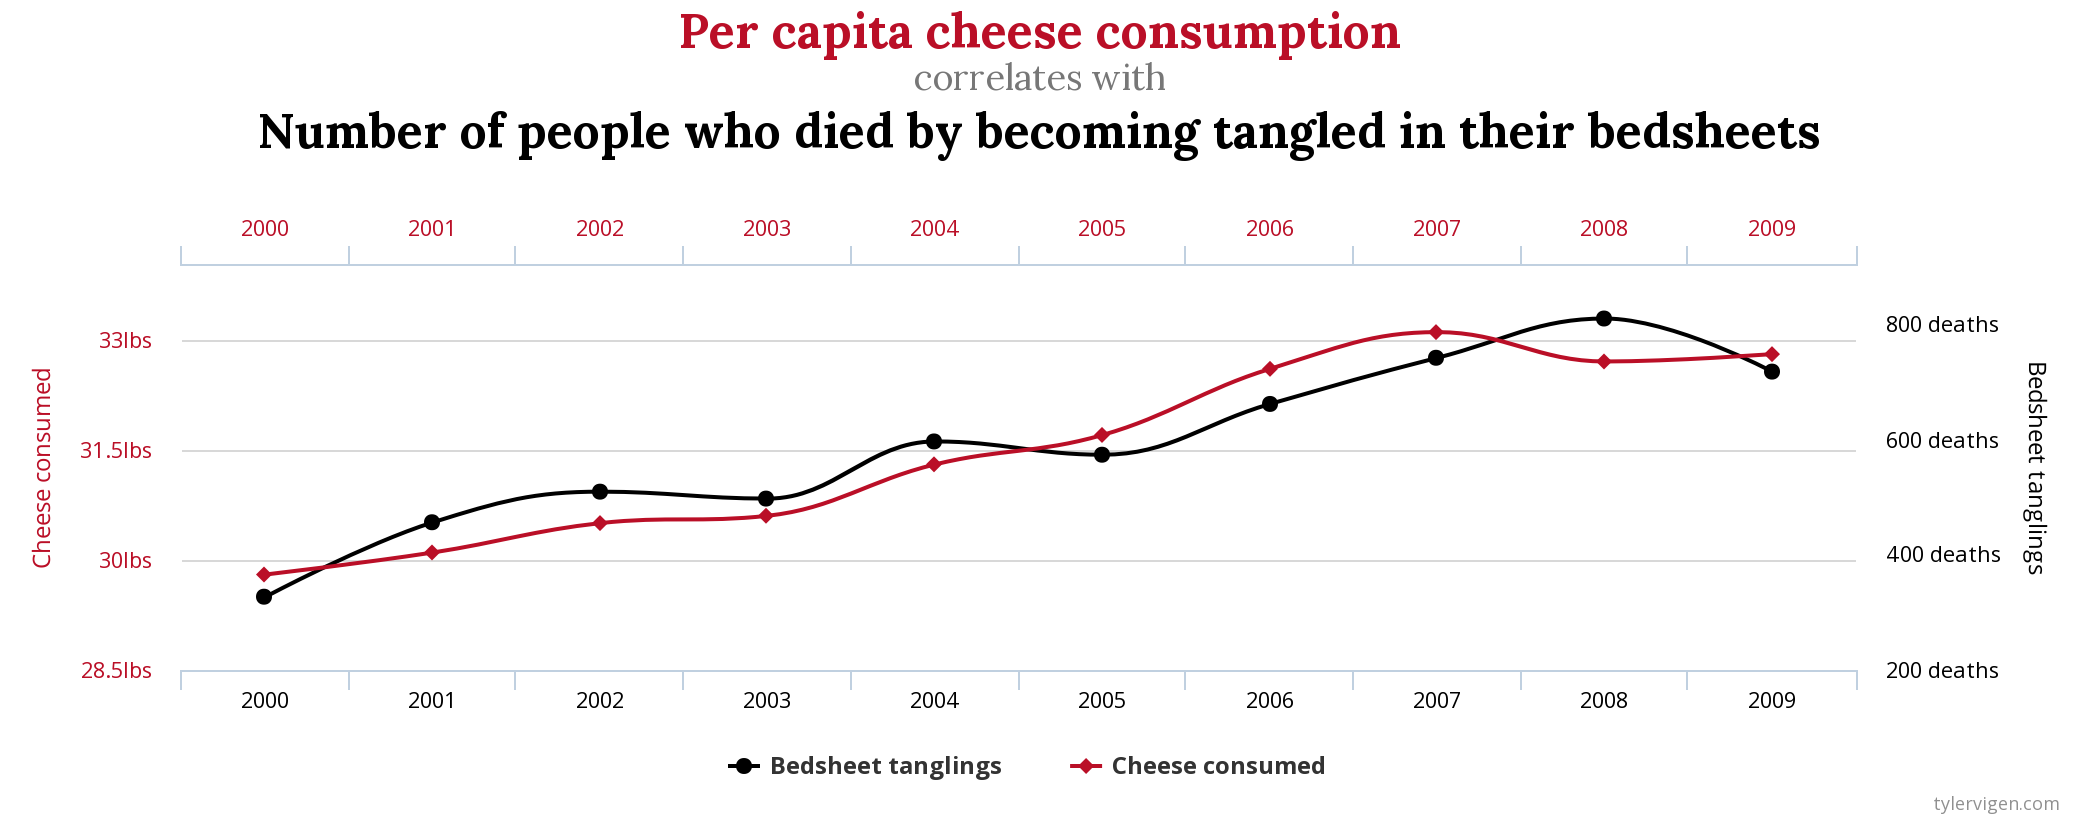

In [ ]:
# ¿Qué relación hay entre número de lanzamientos y las ventas globales?
# El argumento 'hue' de 'relplot' nos permite expresar una tercera dimensión mediante el color

combined = pd.concat([publisher_counts, publisher_sales], axis=1).dropna()
combined = combined.reset_index()  # El anterior índice se añade como columna con el nombre 'index'
combined = combined.rename(columns={'index': 'Publisher', 'Publisher' : 'Count'})  # Renombramos columnas

sns.relplot(x='Count', y='Global_Sales', hue='Publisher', data=combined, height=7)
plt.show()

## Mapa de calor

* Visualizar datos mediante códigos de colores en dos dimensiones (útil para correlaciones)
* El tono y/o la intensidad indica cómo varían los datos en el espacio


In [ ]:
# Visualizamos el nmero de ventas globales para cada una de las plataformas

sales_genre = data[['Platform', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by=['Platform']).sum()
sales_genre = sales_genre.sort_values(by='Global_Sales', ascending=False)[:10]  # Nos quedamos con el Top 10
sales_genre = sales_genre.drop(labels='Global_Sales', axis='columns')  # Quitamos la columna de ventas globales

plt.figure(figsize=(14, 10))
sns.heatmap(sales_genre, annot=True, fmt='.2f', linewidth=3, cmap='Blues')
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Calculamos la correlación en las ventas de los distintos países
# Un número cerca de 1 implica mucha correlación positiva (si sube uno sube el otro)
# Un número cerca de -1 implica correlación negativa (si sube uno baja el otro)
# Un número cerca de 0 implica que no hay correlación

plt.figure(figsize=(14, 10))
sns.heatmap(data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr('spearman'), annot=True, linewidth=3)
plt.show()

## Diagrama de caja

* Describe grupos de datos numéricos mediante cuartiles
* Útil para datos que no siguen una distribución normal
* Muestra el resumen de cinco números:
 * Extremo inferior
 * Cuartil inferior (Q1)
 * Mediana
 * Cuartil superior (Q3)
 * Extremo superior

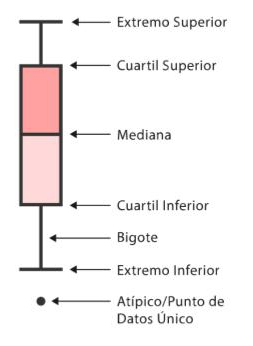

In [ ]:
# Primero vamos a calcular para cada año cuántos juegos hay de cada género

data2 = pd.DataFrame(columns=data['Genre'].unique())
for column in data2:
  data2[column] = data[data['Genre'] == column].groupby(by=['Year']).count()['Rank']  # 'Rank' o cualquier otra
data2

In [ ]:
# Mostramos la distribución de número de juegos por género a lo largo de los años

plt.figure(figsize=(15, 10))
sns.boxplot(data=data2)
plt.show()

## Nube de palabras

* Representación visual de las palabras que conforman un texto
* El tamaño es mayor para las palabras más frecuentes

In [ ]:
# Vamos a sacar todas las palabras individuales que aparecen en los nombres de los videojuegos de Nintendo
# La librería SpaCy nos va a ayudar a extraer las palabras

nlp = spacy.load('en_core_web_md')  # Cargamos el modelo en inglés para que Spacy use las herramientas lingüísticas de este idioma

list_words = [x.split() for x in data[data['Publisher'] == 'Nintendo']['Name'].values]  # Obtenemos todas las palabras individuales para cada nombre
list_words = ' '.join([word for sublist in list_words for word in sublist])  # Las juntamos todas en un único texto

corpus = nlp(list_words)  # Procesamos las palabras con SpaCy
tokens = [w.lower_ for w in corpus if (not w.is_space and not w.is_punct)]  # Eliminamos espacios en blanco y signos de puntuación
corpus = ' '.join(tokens)  # Ya tenemos la lista de palabras limpia

In [ ]:
# Mostramos la nube de palabras en una imagen

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(corpus)
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()